In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pddataset 
from sklearn.model_selection import train_test_split

In [77]:
# Importing the dataset
dataset = pd.read_csv('iris-data-clean.csv')
dataset = dataset.reset_index(drop=True)

dataset['class'] = dataset['class'].replace('Iris-setosa', 5)
dataset['class'] = dataset['class'].replace('Iris-versicolor', 6)
dataset['class'] = dataset['class'].replace('Iris-virginica', 7)

x = dataset.iloc[:, [0, 1]].values
w = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [78]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
w_train, w_test, y_trainv2, y_testv2 = train_test_split(w, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
w_train = sc.fit_transform(w_train)
w_test = sc.transform(w_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
classifier.fit(w_train, y_trainv2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [79]:
y_pred = classifier.predict(x_test)
print(y_pred)
y_predv2 = classifier.predict(x_test2)
print(y_predv2)

[5 6 5 5 7 7 7 6 5 7 7 6 5 7 6 5 7 6 7 7 7 6 7 7 6 6 6 7 7 7 7 5 6 6 7 5 6
 5]
[7 7 6 6 5 7 7 6 6 6 5 5 6 5 5 6 7 6 5 5 5 5 6 5 6 6 6 5 5 7 5 6 6 7 5 6 7
 6]


In [80]:
print(y_test)
print(y_testv2)

[7 7 6 6 5 7 7 6 7 6 5 5 6 5 5 7 7 6 5 5 5 5 6 5 6 6 6 5 5 7 5 6 6 6 5 7 7
 6]
[7 7 6 6 5 7 7 6 7 6 5 5 6 5 5 7 7 6 5 5 5 5 6 5 6 6 6 5 5 7 5 6 6 6 5 7 7
 6]


In [81]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
cmv2 = confusion_matrix(y_testv2, y_predv2)
print(cmv2)


[[ 0  3 11]
 [ 5  7  2]
 [ 4  2  4]]
[[14  0  0]
 [ 0 13  1]
 [ 0  3  7]]


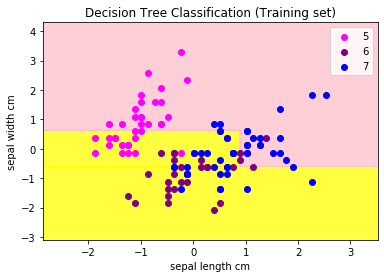

In [93]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
x1, w = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('yellow', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('magenta', 'purple', 'blue'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('sepal length cm')
plt.ylabel('sepal width cm')
plt.legend()
plt.show()

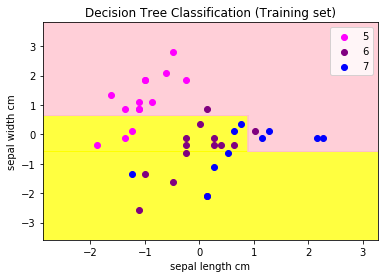

In [98]:
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('magenta', 'purple', 'blue'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('sepal length cm')
plt.ylabel('sepal width cm')
plt.legend()
plt.show()

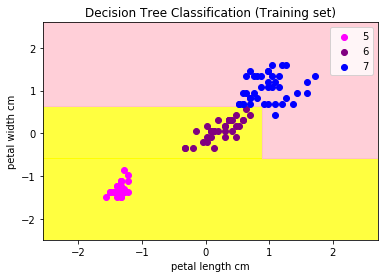

In [100]:
w_set, y_setv2 = w_train, y_trainv2
X1, X2 = np.meshgrid(np.arange(start = w_set[:, 0].min() - 1, stop = w_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = w_set[:, 1].min() - 1, stop = w_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(w_set[y_setv2 == j, 0], w_set[y_setv2 == j, 1],
                color = ListedColormap(('magenta', 'purple', 'blue'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('petal length cm')
plt.ylabel('petal width cm')
plt.legend()
plt.show()

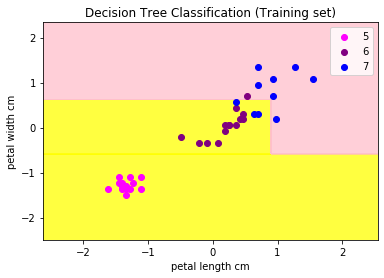

In [102]:
w_set, y_setv2 = w_test, y_testv2
X1, X2 = np.meshgrid(np.arange(start = w_set[:, 0].min() - 1, stop = w_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = w_set[:, 1].min() - 1, stop = w_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(w_set[y_setv2 == j, 0], w_set[y_setv2 == j, 1],
                color = ListedColormap(('magenta', 'purple', 'blue'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('petal length cm')
plt.ylabel('petal width cm')
plt.legend()
plt.show()